# TAREA #1: ENTENDER EL ENUNCIADO DEL PROBLEMA Y EL CASO PRÁCTICO

![alt text](https://drive.google.com/uc?id=1Lw5FjhV2tOEDfYR5QfAd_LzJbe2C921i)



![alt text](https://drive.google.com/uc?id=1LesWzpIGRNxWHQg-hkQmbyk_euKC5pvC)

![alt text](https://drive.google.com/uc?id=1LyvDvR0bChAcvMZavsGRWVCzt90UTiY_)

# TAREA #2: IMPORTAR LIBRERÍAS Y DATASETS

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Deberás montar tu disco usando los siguientes comandos:
# Para obtener más información sobre el montaje, consulta esto: https://stackoverflow.com/questions/46986398/import-data-into-google-colaboratory

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Incluye el link al CSV de tu Drive donde has guardado el Data Set
ad_df = pd.read_csv("/content/drive/MyDrive/ds4b/Bonus/advertising.csv")

In [4]:
ad_df

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,14.0
197,177.0,9.3,6.4,14.8
198,283.6,42.0,66.2,25.5


In [5]:
ad_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [6]:
ad_df.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


# TAREA #3: VISUALIZAR EL DATASET

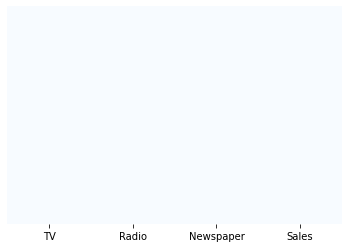

In [7]:
# Veamos si falta algún dato en el dataset, esperemos que no!
sns.heatmap(ad_df.isnull(), yticklabels=False, cbar=False, cmap="Blues")

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fe04071d890>,
      dtype=object)

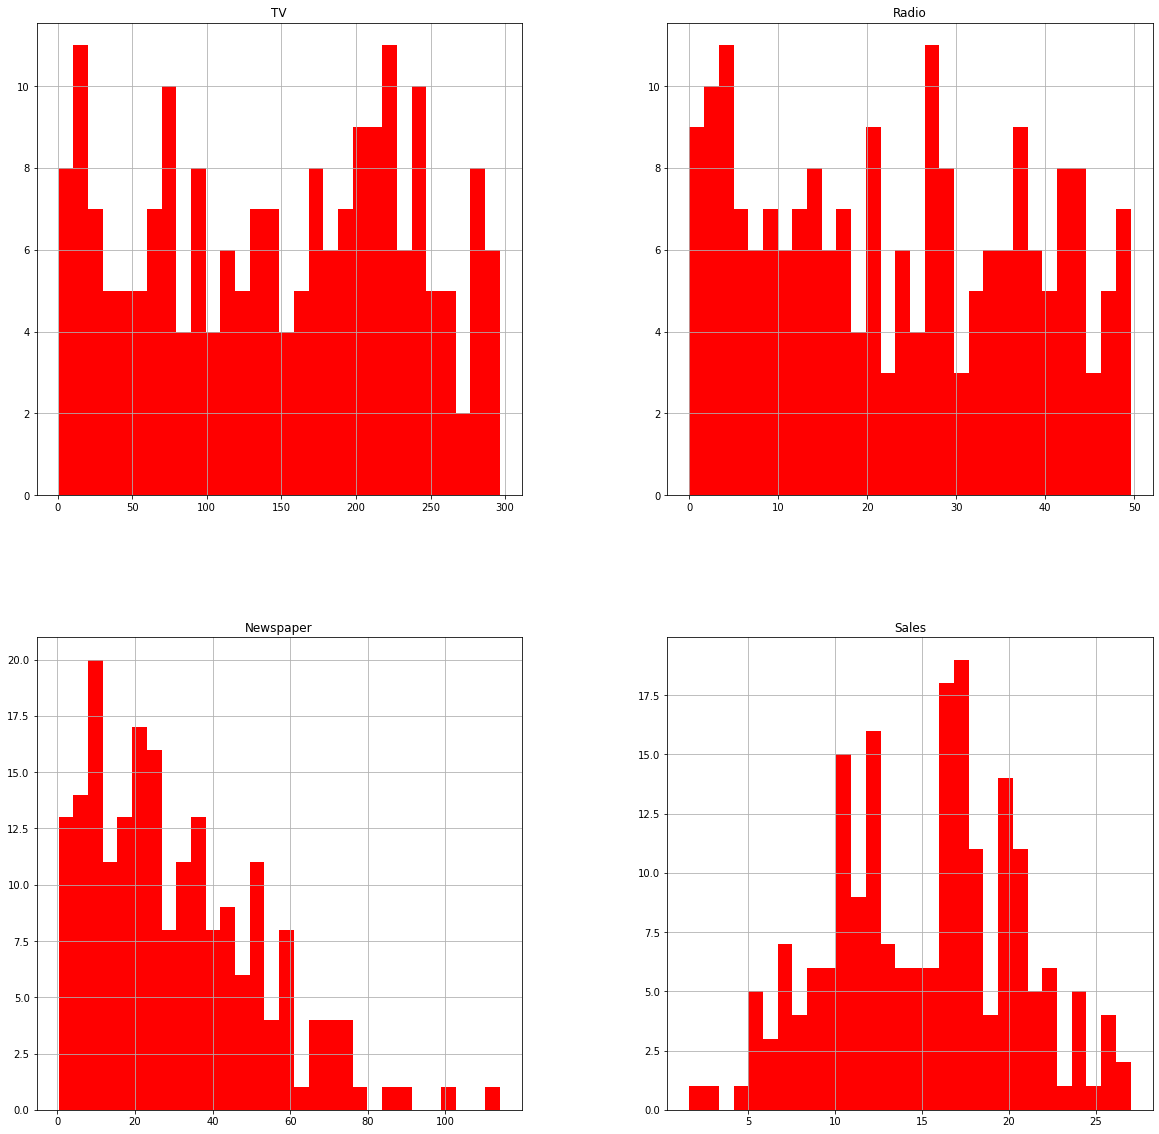

In [8]:
ad_df.hist(bins=30, figsize=(20, 20), color="r")

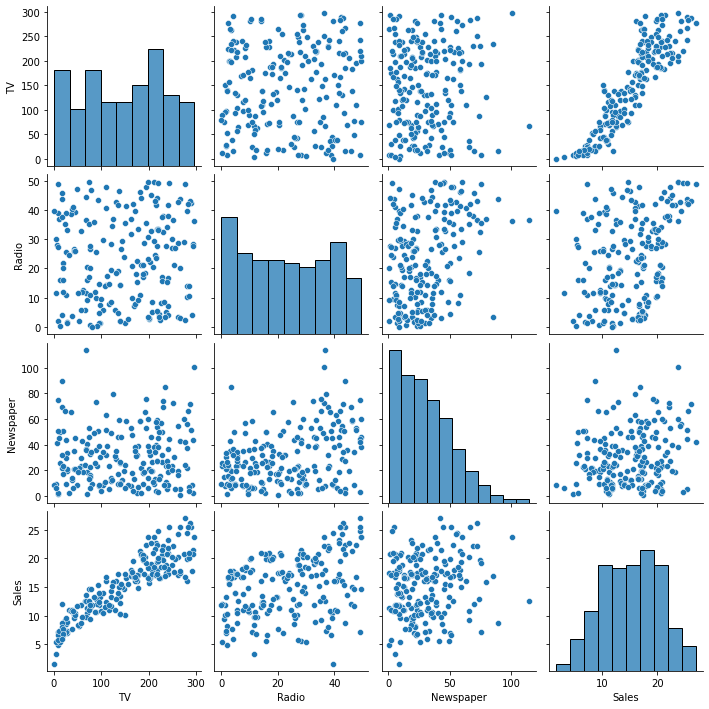

In [9]:
sns.pairplot(ad_df)

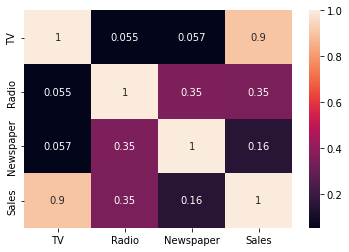

In [10]:
correlations = ad_df.corr()
sns.heatmap(correlations, annot=True)

# TAREA #4: CREAR EL DATASET DE ENTRENAMIENTO Y DE TESTING Y HACER LA LIMPIEZA DE DATOS

In [11]:
ad_df.head(5)

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [12]:
X = ad_df[["TV", "Radio", "Newspaper"]]

In [13]:
X

,TV,Radio,Newspaper
0,230.1,37.8,69.2
1,44.5,39.3,45.1
2,17.2,45.9,69.3
3,151.5,41.3,58.5
4,180.8,10.8,58.4
...,...,...,...
195,38.2,3.7,13.8
196,94.2,4.9,8.1
197,177.0,9.3,6.4
198,283.6,42.0,66.2


In [14]:
X.shape

(200, 3)

In [15]:
y = ad_df["Sales"]

In [16]:
y

0      22.1
1      10.4
2      12.0
3      16.5
4      17.9
       ... 
195     7.6
196    14.0
197    14.8
198    25.5
199    18.4
Name: Sales, Length: 200, dtype: float64

In [17]:
y.shape

(200,)

In [18]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [19]:
X_train.shape

(160, 3)

In [20]:
X_test.shape

(40, 3)

# TAREA #5: ENTRENAR EL MODELO

In [21]:
from sklearn.linear_model import LinearRegression

In [22]:
regressor = LinearRegression(fit_intercept=True)

In [23]:
regressor.fit(X_train, y_train)

LinearRegression()

In [24]:
print("Linear Model Coeff(m):", regressor.coef_)
print("Linear Model Coeff(b):", regressor.intercept_)

Linear Model Coeff(m): [0.05427777 0.10547742 0.00095667]
Linear Model Coeff(b): 4.6163511301040625


Es mucho más beneficioso invertir en Radio.

# TAREA #6: EVALUAR EL MODELO

In [25]:
y_predict = regressor.predict(X_test)
y_predict

array([ 8.57138022, 19.43182352, 14.05003007,  8.296396  ,  8.92294988,
       15.66704324, 16.88838268, 13.73861825, 21.30378675,  8.73091648,
       14.67636086, 24.62963942,  7.97384925, 10.1283782 , 13.92520447,
       20.30410734, 19.20865713, 18.68768655, 17.0518508 , 19.90028034,
       11.93289481, 20.68018349, 10.45763934, 12.20353749, 16.75768746,
       16.77591437, 13.09121107, 19.26603776, 15.624797  ,  9.805549  ,
        6.93000818, 18.10337809, 20.99879397, 11.08186612, 13.70463407,
       18.13765245, 18.80650336, 10.22853477, 12.11470341, 24.12040256])

In [26]:
y_test

170     8.4
27     20.9
57     13.2
182     8.7
66     11.0
89     16.7
97     20.5
159    12.9
176    20.2
44      8.5
179    17.6
101    23.8
121     7.0
136     9.5
37     14.7
15     22.4
14     19.0
70     18.3
105    15.0
178    16.8
94     11.5
55     23.7
2      12.0
135    11.6
43     17.9
162    19.9
161    13.3
62     20.7
4      17.9
38     10.1
189     6.7
193    19.6
39     21.5
51     10.7
116    12.2
153    16.0
74     17.0
75      8.7
71     12.4
17     24.4
Name: Sales, dtype: float64

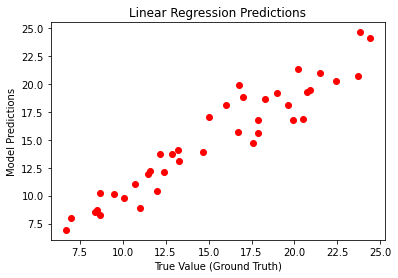

In [27]:
plt.scatter(y_test, y_predict, color="r")
plt.xlabel("True Value (Ground Truth)")
plt.ylabel("Model Predictions")
plt.title("Linear Regression Predictions")
plt.show()

In [28]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

MRSE = float(format(np.sqrt(mean_squared_error(y_test, y_predict)), ".3f"))
MSE = mean_squared_error(y_test, y_predict)
MAE = mean_absolute_error(y_test, y_predict)
MAPE = np.mean(np.abs((y_test - y_predict) / y_test))*100

In [29]:
print("RMSE = {} \nMSE = {} \nMAE = {} \nMean Absolute Percentage Error = {} %".format(MRSE, MSE, MAE, MAPE))

RMSE = 1.572 
MSE = 2.470465343098323 
MAE = 1.249803479989908 
Mean Absolute Percentage Error = 8.079567429219694 %


# BUEN TRABAJO!